In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/2000casebpi2019.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='Clear Invoice':
        print("activity: "+act_res[0][0]+" resource: "+act_res[0][1])
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/2000 [00:00<?, ?it/s]

activity: Clear Invoice resource: user_002
number of distinct batches: 50
Simultaneous 14
2018-02-01 12:01:00 to  2018-02-01 12:01:00
2018-05-03 14:51:00 to  2018-05-03 14:51:00
2018-05-04 10:14:00 to  2018-05-04 10:14:00
2018-05-15 12:12:00 to  2018-05-15 12:12:00
2018-06-12 12:23:00 to  2018-06-12 12:23:00
2018-06-21 12:42:00 to  2018-06-21 12:42:00
2018-07-10 13:10:00 to  2018-07-10 13:10:00
2018-08-14 13:46:00 to  2018-08-14 13:46:00
2018-10-18 15:32:00 to  2018-10-18 15:32:00
2018-11-15 15:35:00 to  2018-11-15 15:35:00
2018-12-14 16:50:00 to  2018-12-14 16:50:00
2018-12-17 11:55:00 to  2018-12-17 11:55:00
2019-01-15 12:01:00 to  2019-01-15 12:01:00
2019-01-17 14:40:00 to  2019-01-17 14:40:00
Concurrent batching 36
2018-02-22 16:15:00 to  2018-02-22 16:18:00
2018-03-29 15:06:00 to  2018-03-29 15:11:00
2018-04-05 15:48:00 to  2018-04-05 15:51:00
2018-04-12 14:07:00 to  2018-04-12 14:08:00
2018-04-19 14:46:00 to  2018-04-19 14:47:00
2018-04-26 11:11:00 to  2018-04-26 11:16:00
2018-05

In [2]:
#targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\comaparisionresponsedf2000samplebpi2019.csv')
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\bpi2019biggertargetnewfeature.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date'])
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [18]:
targetdatedataframe.sort_values(by='tokenconsumed')

,date,tokenproduced,tokenconsumed,tokenleft,oneframetoken,WaitingTime,Count,consumedByUserList,rolledmean,batched,longtermtokenproduced,oldtokenconsumed,chunkmean,chunkindex,pchunkmean,pchunkindex
0,2018-01-05,1,0,1,0,378 days 11:38:00,1,0,0.000000,0,1,0,0.066667,1,1.000000,1
345,2018-12-16,0,0,90,0,4064 days 15:31:00,90,0,3.039592,0,0,0,0.000000,31,0.104167,19
215,2018-08-08,2,0,204,0,6882 days 20:32:00,204,0,2.239122,0,2,0,3.300000,20,2.582609,17
214,2018-08-07,7,0,202,0,6894 days 20:38:00,202,0,2.238944,0,7,0,0.000000,19,2.582609,17
213,2018-08-06,5,0,195,0,6931 days 21:17:00,195,0,2.238542,0,5,0,0.000000,19,2.582609,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2018-10-26,9,45,150,0,7894 days 17:17:00,195,0,4.351490,1,9,45,3.400000,24,2.582609,17
202,2018-07-26,3,48,175,0,8864 days 18:45:00,223,0,4.617588,1,3,48,4.200000,18,2.582609,17
364,2019-01-04,0,50,32,0,5306 days 14:39:00,82,0,3.579766,1,0,50,12.000000,32,0.104167,19
111,2018-04-26,6,51,178,0,8520 days 18:45:00,229,0,4.017767,1,6,51,6.000000,9,3.160000,10


[45, 50, 55, 70, 75, 85, 105, 110, 125, 130, 140, 145, 155, 175, 180, 190, 195, 210, 215, 225, 230, 245, 280, 295, 300, 315, 320, 330, 335, 345, 360, 365, 370, 378]


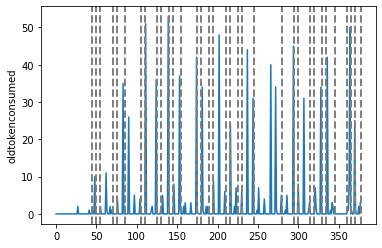

In [5]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['oldtokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="oldtokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

[10, 15, 25, 30, 45, 70, 80, 85, 90, 115, 120, 125, 130, 150, 155, 190, 305, 330, 378]


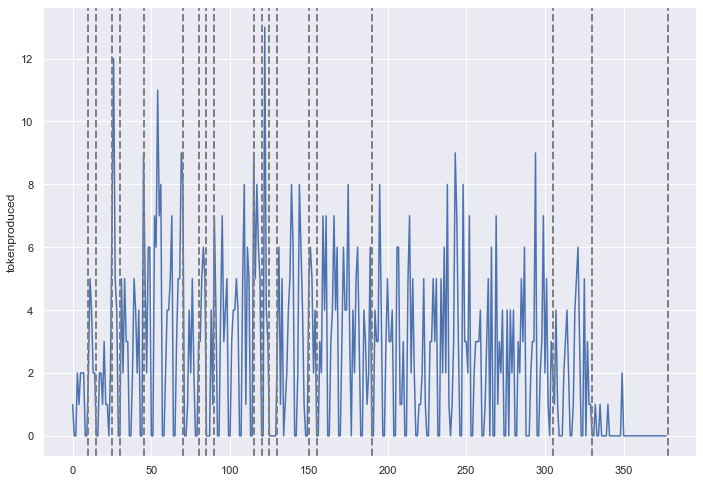

In [8]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['longtermtokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


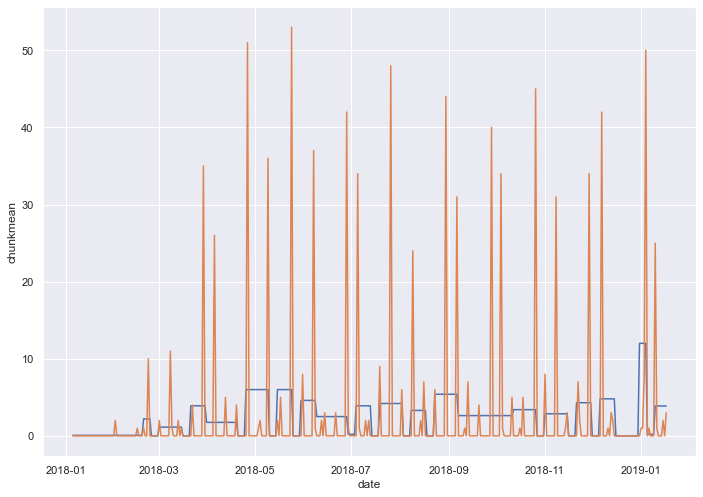

In [7]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['oldtokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='oldtokenconsumed')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


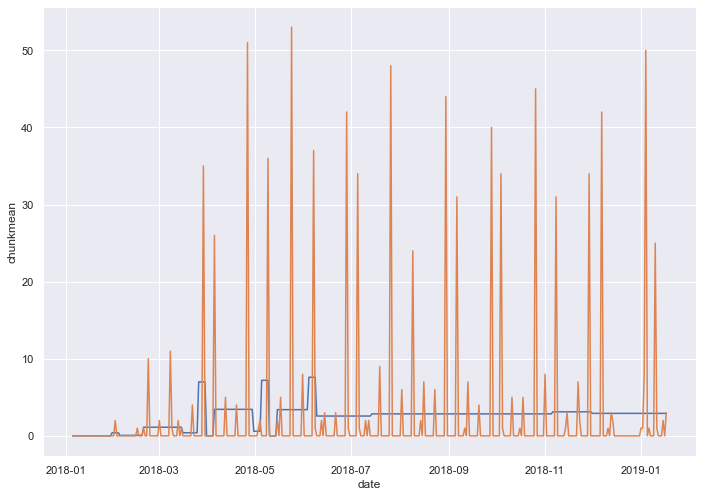

In [8]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
def categorise(row):   
    if row['chunkmean']*1.5 < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

38


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched
27,2018-02-01,5,2,59,582 days 20:05:00,61,"['4507001585_00010', '4507001128_00030']",0.400000,4,1
48,2018-02-22,6,10,108,2276 days 18:45:00,118,"['4507006556_00010', '4507006456_00010', '4507...",1.120000,6,1
55,2018-03-01,7,2,143,2836 days 05:29:00,145,"['4507003076_00120', '4507001122_00010']",1.120000,6,1
62,2018-03-08,5,11,155,3813 days 21:21:00,166,"['4507009375_00190', '4507005530_00020', '4507...",1.120000,6,1
67,2018-03-13,5,2,167,4116 days 03:43:00,169,"['4507010967_00010', '4507009273_00030']",1.120000,6,1
76,2018-03-22,5,4,196,5686 days 01:21:00,200,"['4507013108_00080', '4507012522_00030', '4507...",0.400000,7,1
83,2018-03-29,6,35,180,6946 days 09:01:00,215,"['4507012927_00050', '4507012217_00240', '4507...",7.000000,8,1
90,2018-04-05,7,26,171,6446 days 00:54:00,197,"['4507015867_00420', '4507015867_00100', '4507...",3.440000,10,1
111,2018-04-26,6,51,178,8918 days 04:49:00,229,"['4507020559_00060', '4507020555_00020', '4507...",3.440000,10,1
119,2018-05-04,5,2,213,7442 days 13:20:00,215,"['4507005576_00050', '4507004163_00010']",0.600000,11,1


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


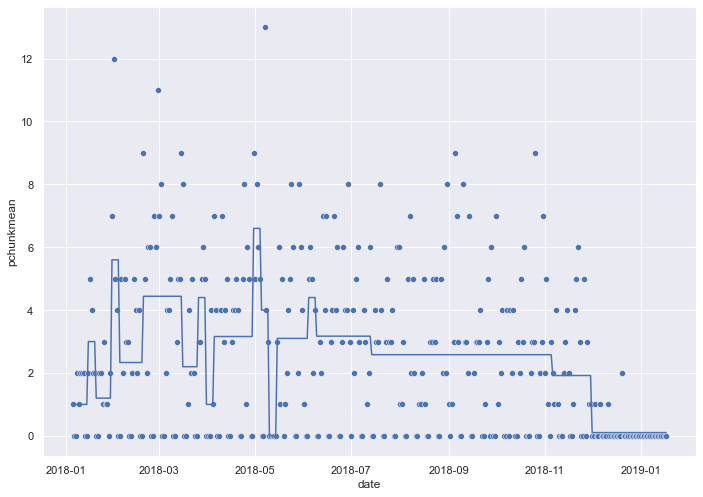

In [15]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['longtermtokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean' ,color='b' )
sns.scatterplot(data=targetdatedataframe, x='date', y='longtermtokenproduced')
sns.set(rc={'figure.figsize':(11.7,8.27)})

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


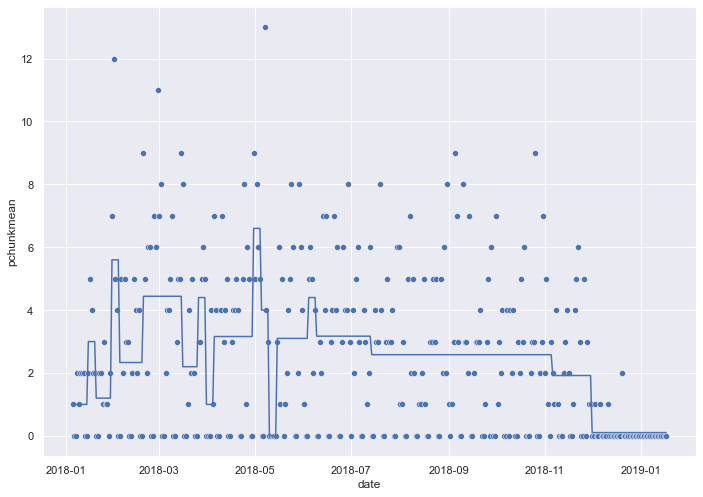

In [13]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.scatterplot(data=targetdatedataframe, x='date', y='tokenproduced')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [67]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

150


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
3,2018-01-11,2,0,5,3 days 06:56:00,5,[],1.063158,1,0,1.033333,1,1
8,2018-01-16,2,0,8,30 days 18:44:00,8,[],1.063158,1,0,1.033333,1,1
10,2018-01-18,3,0,11,45 days 02:46:00,11,[],1.063158,1,0,1.033333,1,1
14,2018-01-22,2,0,13,88 days 08:28:00,13,[],1.063158,1,0,1.033333,1,1
16,2018-01-24,2,0,16,113 days 22:43:00,16,[],1.063158,1,0,1.033333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2018-12-21,3,0,82,2310 days 03:12:00,82,[],0.320000,24,0,1.066667,25,1
354,2018-12-28,2,0,85,2887 days 01:34:00,85,[],0.320000,24,0,1.066667,25,1
357,2018-12-31,2,0,87,3141 days 05:38:00,87,[],0.320000,24,0,0.368421,26,1
364,2019-01-07,2,0,28,739 days 22:04:00,28,[],8.500000,25,0,0.368421,26,1


In [1]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
pd.set_option('display.max_rows', 80)
df['date']=df['batchingdate'].dt.date
df.sort_values(by='batchingdate').nunique()

NameError: name 'batchespm4py' is not defined

In [37]:
batcheddf['date']=batcheddf['date'].dt.date

In [30]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
df['date']=df['batchingdate'].dt.date
date = df.date.unique()
df=pd.DataFrame(date, columns = ['date'])
print(type(batcheddf['date']))

61


KeyError: 1

In [41]:

pd.merge(batcheddf,df,on='date',how='left').nunique()

date                  38
tokenproduced         10
tokenconsumed         25
tokenleft             33
WaitingTime           38
Count                 33
consumedByUserList    38
chunkmean             12
chunkindex            13
chunkbatched           1
dtype: int64

In [60]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date